# Predicting house prices with a NN/Keras

This project is based on the NN guide I found online..

https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

The dataset we will use today is adapted from Zillow’s Home Value Prediction Kaggle competition data. We’ve reduced the number of input features and changed the task into predicting whether the house price is above or below median value. Please visit the below link to download the modified dataset below and place it in the same directory as your notebook. The download icon should be on the top right.

###  Import libraries

In [43]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

import matplotlib.pyplot as plt

### Import Data

- Read in the CSV (comma separated values) file and convert them to arrays. Arrays are a data format that our algorithm can process.
- Split our dataset into the input features (which we call x) and the label (which we call y).
- Scale the data (we call this normalization) so that the input features have similar orders of magnitude.
- Split our dataset into the training set, the validation set and the test set. If you need a refresher on why we need these three datasets, please refer to Intuitive Deep Learning Part 1b.

In [9]:
df_data = pd.read_csv('data/housepricedata.csv')
dataset = df_data.values

In [10]:
df_data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [11]:
X = dataset[:,0:10]
Y = dataset[:,10] # TARGET

In [12]:
# Normlaisation
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
#Train/Test
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


#### Train Test Splitting
- X_train (10 input features, 70% of full dataset)
- X_val (10 input features, 15% of full dataset)
- X_test (10 input features, 15% of full dataset)
- Y_train (1 label, 70% of full dataset)
- Y_val (1 label, 15% of full dataset)
- Y_test (1 label, 15% of full dataset)

#### Features
- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

### Build Neural Network

we want to have these layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [27]:
model = Sequential([Dense(32, activation='relu', input_shape=(10,)),
                    Dense(32, activation='relu'),   
                    Dense(1, activation='sigmoid'),])

In [28]:
model.compile(optimizer='sgd',              
              loss='binary_crossentropy',              
              metrics=['accuracy'])

In [29]:
hist = model.fit(X_train, 
                 Y_train,          
                 batch_size=32, 
                 epochs=100,       #How long do we want to run it for....      
                 validation_data=(X_val, Y_val))  #Reporting on how each epoch is doing against a valiation dataset

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 204us/step - loss: 0.6730 - accuracy: 0.5078 - val_loss: 0.6710 - val_accuracy: 0.4977
Epoch 2/100
1022/1022 [==============================] - 0s 72us/step - loss: 0.6675 - accuracy: 0.5088 - val_loss: 0.6651 - val_accuracy: 0.4932
Epoch 3/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.6618 - accuracy: 0.5127 - val_loss: 0.6587 - val_accuracy: 0.4977
Epoch 4/100
1022/1022 [==============================] - 0s 70us/step - loss: 0.6560 - accuracy: 0.5294 - val_loss: 0.6525 - val_accuracy: 0.5434
Epoch 5/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.6505 - accuracy: 0.5793 - val_loss: 0.6468 - val_accuracy: 0.6484
Epoch 6/100
1022/1022 [==============================] - 0s 68us/step - loss: 0.6455 - accuracy: 0.6184 - val_loss: 0.6413 - val_accuracy: 0.7032
Epoch 7/100
1022/1022 [==============================] - 0s 75us/step - loss

1022/1022 [==============================] - 0s 65us/step - loss: 0.3418 - accuracy: 0.8728 - val_loss: 0.3077 - val_accuracy: 0.8813
Epoch 57/100
1022/1022 [==============================] - 0s 73us/step - loss: 0.3390 - accuracy: 0.8718 - val_loss: 0.3047 - val_accuracy: 0.8721
Epoch 58/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.3368 - accuracy: 0.8689 - val_loss: 0.3018 - val_accuracy: 0.8721
Epoch 59/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.3352 - accuracy: 0.8757 - val_loss: 0.3006 - val_accuracy: 0.8858
Epoch 60/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.3336 - accuracy: 0.8708 - val_loss: 0.2980 - val_accuracy: 0.8721
Epoch 61/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.3311 - accuracy: 0.8728 - val_loss: 0.2960 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.3296 - accuracy: 0.8787 - val_loss: 0.2958 - val_a

In [30]:
print('loss = ',model.evaluate(X_test, Y_test)[0])
print('accuracy = ',model.evaluate(X_test, Y_test)[1])

219/219 [==============================] - 0s 37us/step
loss =  0.2526060356397063
219/219 [==============================] - 0s 59us/step
accuracy =  0.9041095972061157


#### Visualizing Loss and Accuracy

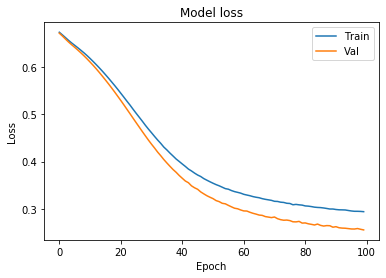

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

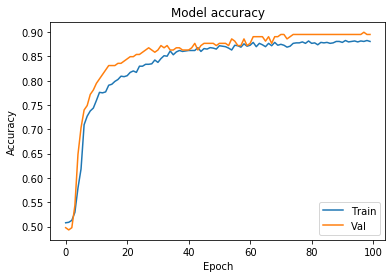

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### Adding Regularization to our Neural Network

For the sake of introducing regularization to our neural network, let’s formulate with a neural network that will badly overfit on our training set. We’ll call this Model 2.

In [38]:
model_2 = Sequential([Dense(1000, activation='relu', input_shape=(10,)),    
                      Dense(1000, activation='relu'),    
                      Dense(1000, activation='relu'),    
                      Dense(1000, activation='relu'),    
                      Dense(1, activation='sigmoid'),])

model_2.compile(optimizer='adam',              
                loss='binary_crossentropy',             
                metrics=['accuracy'])

hist_2 = model_2.fit(X_train, 
                     Y_train,          
                     batch_size=32, 
                     epochs=100,          
                     validation_data=(X_val, Y_val))



Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5094 - accuracy: 0.7554 - val_loss: 0.3155 - val_accuracy: 0.8767
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3589 - accuracy: 0.8493 - val_loss: 0.3065 - val_accuracy: 0.8721
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3341 - accuracy: 0.8601 - val_loss: 0.2682 - val_accuracy: 0.8813
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3394 - accuracy: 0.8562 - val_loss: 0.2701 - val_accuracy: 0.8904
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3060 - accuracy: 0.8708 - val_loss: 0.2383 - val_accuracy: 0.8950
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2799 - accuracy: 0.8855 - val_loss: 0.2382 - val_accuracy: 0.8904
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2779

Epoch 57/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1680 - accuracy: 0.9188 - val_loss: 0.3350 - val_accuracy: 0.8904
Epoch 58/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.1481 - accuracy: 0.9364 - val_loss: 0.3056 - val_accuracy: 0.8858
Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1537 - accuracy: 0.9315 - val_loss: 0.3308 - val_accuracy: 0.8767
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1521 - accuracy: 0.9276 - val_loss: 0.3904 - val_accuracy: 0.8721
Epoch 61/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.1813 - accuracy: 0.9266 - val_loss: 0.3040 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1849 - accuracy: 0.9178 - val_loss: 0.3171 - val_accuracy: 0.9087
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1564 - accuracy: 0.9286 - val_loss: 0.3819 -

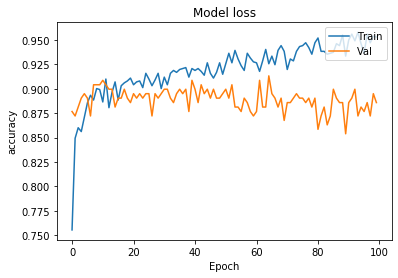

In [47]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

To deal with overfitting, we can code in the following strategies into our model each with about one line of code:

*Difference 1*: To add L2 regularization, notice that we’ve added a bit of extra code in each of our dense layers. This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.

*Difference 2*: adding dropout means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. Let’s compile it and run it with the same parameters as our Model 2 (the overfitting one).


In [44]:
model_3 = Sequential([Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),    Dropout(0.3),    
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    
                      Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

model_3.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy'])

hist_3 = model_3.fit(X_train, 
                     Y_train,          
                     batch_size=32, 
                     epochs=100,          
                     validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 14.6453 - accuracy: 0.5939 - val_loss: 4.0270 - val_accuracy: 0.7991
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 1.7467 - accuracy: 0.8190 - val_loss: 0.6583 - val_accuracy: 0.8493
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5676 - accuracy: 0.8640 - val_loss: 0.4821 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.5185 - accuracy: 0.8542 - val_loss: 0.4570 - val_accuracy: 0.9087
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4936 - accuracy: 0.8728 - val_loss: 0.4661 - val_accuracy: 0.8676
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4971 - accuracy: 0.8699 - val_loss: 0.4492 - val_accuracy: 0.8767
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.479

Epoch 57/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4494 - accuracy: 0.8796 - val_loss: 0.3990 - val_accuracy: 0.8813
Epoch 58/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4431 - accuracy: 0.8757 - val_loss: 0.3918 - val_accuracy: 0.8858
Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4506 - accuracy: 0.8728 - val_loss: 0.4109 - val_accuracy: 0.9041
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4445 - accuracy: 0.8855 - val_loss: 0.3877 - val_accuracy: 0.8950
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4544 - accuracy: 0.8796 - val_loss: 0.3907 - val_accuracy: 0.8995
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4596 - accuracy: 0.8620 - val_loss: 0.4274 - val_accuracy: 0.8721
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4831 - accuracy: 0.8591 - val_loss: 0.3972 -

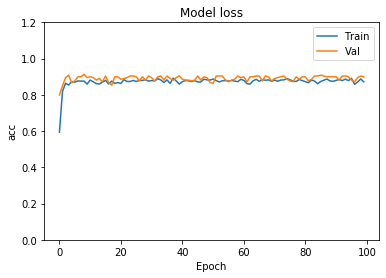

In [46]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()